In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import measure
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.path import Path

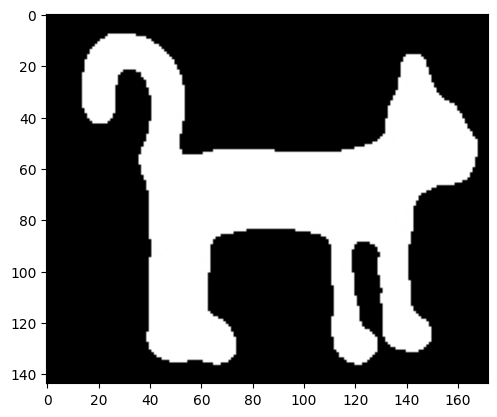

In [2]:
img = cv2.imread('cat_1_mask_classical.jpg')
plt.imshow(img)
plt.show()

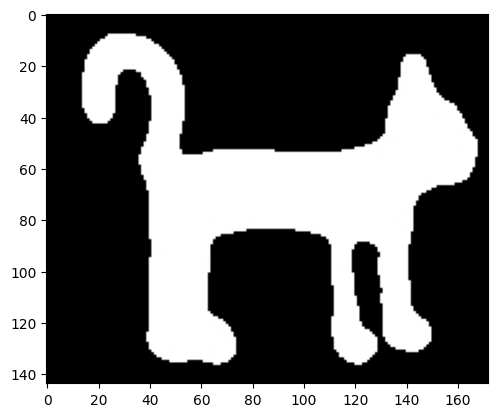

In [3]:
kernel = np.ones((3, 3), np.uint8) 
img = cv2.erode(img, kernel)
img = cv2.dilate(img,kernel)
plt.imshow(img)
plt.show()

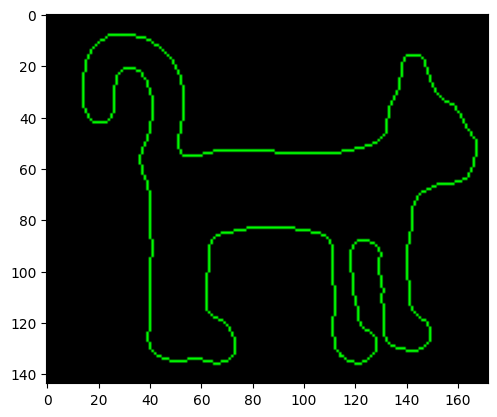

In [4]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(grayscale, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour_img = np.zeros(img.shape, dtype=np.uint8)
cv2.drawContours(contour_img, contours, -1, (0,255,0), 1)
plt.imshow(contour_img)
plt.show()

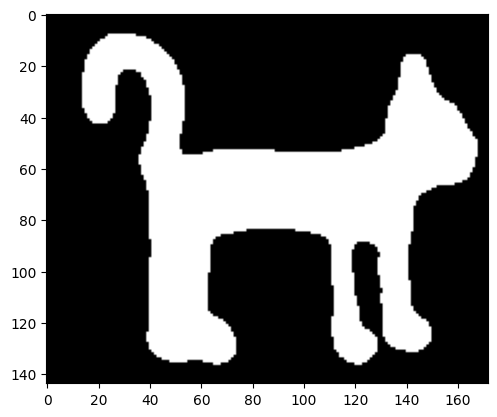

In [5]:
poly_img = np.zeros(img.shape, dtype=np.uint8)
cv2.fillPoly(poly_img, pts=contours, color=(255, 255, 255))
gray_poly_img = cv2.cvtColor(poly_img, cv2.COLOR_BGR2GRAY)
gray_poly_img = cv2.normalize(gray_poly_img.astype(np.double), None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(gray_poly_img, cmap="gray")
plt.show()

In [6]:
contours = measure.find_contours(gray_poly_img)
closed_contours = []
for contour in contours:
    closed_contour = np.vstack([contour, contour[0]])
    closed_contours.append(closed_contour)

points = np.vstack(closed_contours)
points = points[:, [1, 0]]

vor = Voronoi(points)
polygon = Path(points)

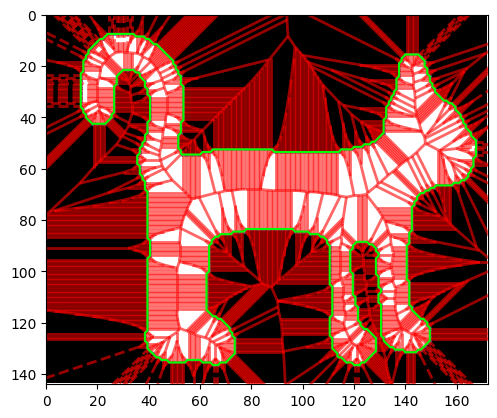

In [8]:
fig, ax = plt.subplots()
ax.imshow(gray_poly_img, cmap='gray')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='red', line_width=2, line_alpha=0.6, point_size=2)
ax.plot(points[:, 0], points[:, 1], 'lime', markersize=1)
ax.set_xlim([0, gray_poly_img.shape[1]])
ax.set_ylim([gray_poly_img.shape[0], 0])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[array([ 46.5, 135.5]),
 array([ 49., 133.]),
 array([ 48.5, 134.5]),
 array([ 46., 137.])]